# unbalanced data problems

** 정의 **
- 각 클래스에 속한 데이터의 갯수의 차이에 의해서 발생하는 문제 : imbalanced data problem
- 데이터 클래스 비율이 너무 차이가 크면 우세한 클래스를 선택하는 모형의 정확도가 높아지므로 모형의 성능판별이 어렵다.
- 정확도가 높아도 데이터 갯수가 적은 클래스의 재현율 recall-rate이 급격히 작아질 수 있다. 
   - 재현율 recall-score, TPR : TP / TP + FN : P라고 예측한 것 중에서 실제 P이 것의 비율
   - 정밀도 precision : TP / TP + FP : 실제 P인 것 중에서 P라고 맞게 예측한 것의 비율
- 균형 데이터와 불균형 데이터를 SVC로 분류분석 하면
   - 균형 데이터 분석의 acc 성능은 0.83이고 각 클래스의 precision, recall, f1 score가 모두 비슷한 값이다.
   - 불균형 데이터 분석의 acc 성능은 0.95이지만 갯수가 적은 클래스의 precision, recall, f1 score가 현저하게 작다.
   - 즉 acc 만으로 현재 분류가 잘 됐다고 판단할 수 없다. 
   - classification_report, confusion_matrix, roc_curve 사용하여 비교할 수 있다. 
- 불균형 문제의 해결방법
   - 언더 샘플링 under sampling : 다수 클래스 데이터 일부만 사용
   - 오버 샘플링 over sampling : 소수 클래스 데이터를 증가 시켜서 사용
   - 복합 샘플링 combining over and under sampling
- 언더 샘플링 : from imblearn import under_sampling
   - RandomUnderSampler() : 무작위로 데이터를 없애는 단순 샘플링 (다수 클래스에서 데이터 제거), 소수 클래스에 대한 recall 값이 증가한다.
   - TomekLinks() : 서로 다른 클래스의 데이터가 가까이 붙어있는 경우 토맥링크가 된다. 토맥링크인 데이터들을 찾은 후 다수 클래스의 데이터를 제거한다. 판별경계선을 다수 클래스쪽으로 밀어 붙이는 효과가 있다.
      - sampling_strategy={"auto", "not majority", "not minority", "all"} : 토맥링크에서 어떤 데이터를 제거할지 설정 가능
      - 다수 데이터를 제거하는 경우의 지표가 전반적으로 좋아짐
   - CondensedNearestNeighbour() : CNN : 1-NN 모형으로 분류되지 않는 데이터만 남기는 방법
      - 1-NN : 한개의 가장 가까운 이웃 규칙
      - 소수 클래스의 데이터를 모두 그룹 S에 포함시킨다.
      - 다수 데이터 중에서 하나를 고르고, 이 데이터의 가장 가까운 데이터가 다수 클래스이면 포함시키지 않고, 가까운 데이터가 소수 클래스 데이터이면 S에 포함시킨다.
      - 더이상 선택되는 데이터가 없을 때까지 반복
      - S에 포함된 데이터만 남긴다.
      - n_neighbor=2 : 값을 높이면 오히려 데이터의 불균형이 더 심해질 수 있다.
   - OneSidedSelection() : tomek link 방법과 condensed nearest neighbour 방법을 혼합한 방법. tomek link에서 다수 클래스 데이터를 제거하고 나머지 데이터 중에서 서로 붙어있는 다수 클래스 데이터를 1-NN 방법으로 제거한다.
   - EditedNearestNeighbours() : 다수 클래스 데이터 중 가장 가까운 k개의 데이터가 모두 또는 다수가 다수 클래스가 아니면 제거한다. 즉 소수 클래스 데이터 주변의 다수 클래스 데이터가 제거 된다.
   - NeighbourhoodCleaningRule() : CNN + ENN
      - CNN : 소수 클래스 데이터를 S 집단으로 구분하고, 다수 클래스 중 가까운 데이터가 소수 클래스 데이터가 있으면 살림
      - ENN : 다스 클래스 데이터의 주변 k개의 데이터가 다수 클래스가 아니면 제거
- 오버 샘플링 : from imblearn import over_sampling
   - RandomOverSampler() : 소수 클래스 데이터를 반복해서 넣는 것(replacement). 가중치 증가와 비슷하다.
   - ADASYN() : 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중에서 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법
   - SMOTE() : ADASYN() 방법과 같이 데이터를 생성하되, 분류 모형에 따라서 클래스를 분류한다.
- 복합 샘플링
   - from imblearn.combine import *
   - SMOTEENN() : SMOTE + ENN : 생성하고, 다수 클래스 데이터 주변 k개의 데이터가 다수 클래스가 아닌 경우 제거
   - SMOTETomek() : SMOTE + Tomek : 생성하고, tomek link 찾아서 다수 클래스 데이터만 제거

### 균형 데이터와 불균형 데이터

In [7]:
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.svm import SVC

In [30]:
def classification_result(n0, n1, title="") : 
    
    # 확률변수에서 독립 데이터 샘플링
    rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
    rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
    X0 = rv1.rvs(n0, random_state=0)
    X1 = rv2.rvs(n1, random_state=0)
    X = np.vstack([X0, X1])
    # 종속변수 데이터 샘플링
    y = np.hstack([np.zeros(n0), np.ones(n1)])
    
    # 그래프의 좌표 생성
    x1min = -4, ; x1max = 4
    x2min = -2  ; x2max = 2
    xx1 = np.linspace(x1min, x1max, 1000)
    xx2 = np.linspace(x2min, x2max, 1000)
    X1, X2 = np.meshgrid(xx1, xx2)
    
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05],
                linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05],
                linestyles="dashed")
    
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y==0, 0], X[y==0, 1], marker="x", label="class 0")
    plt.scatter(X[y==1, 0], X[y==1, 1], marker="o", label="class 1")
    plt.contour(X1, X2, Y, colors="k", levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    
    return model, X, y, y_pred

In [25]:
%matplotlib inline

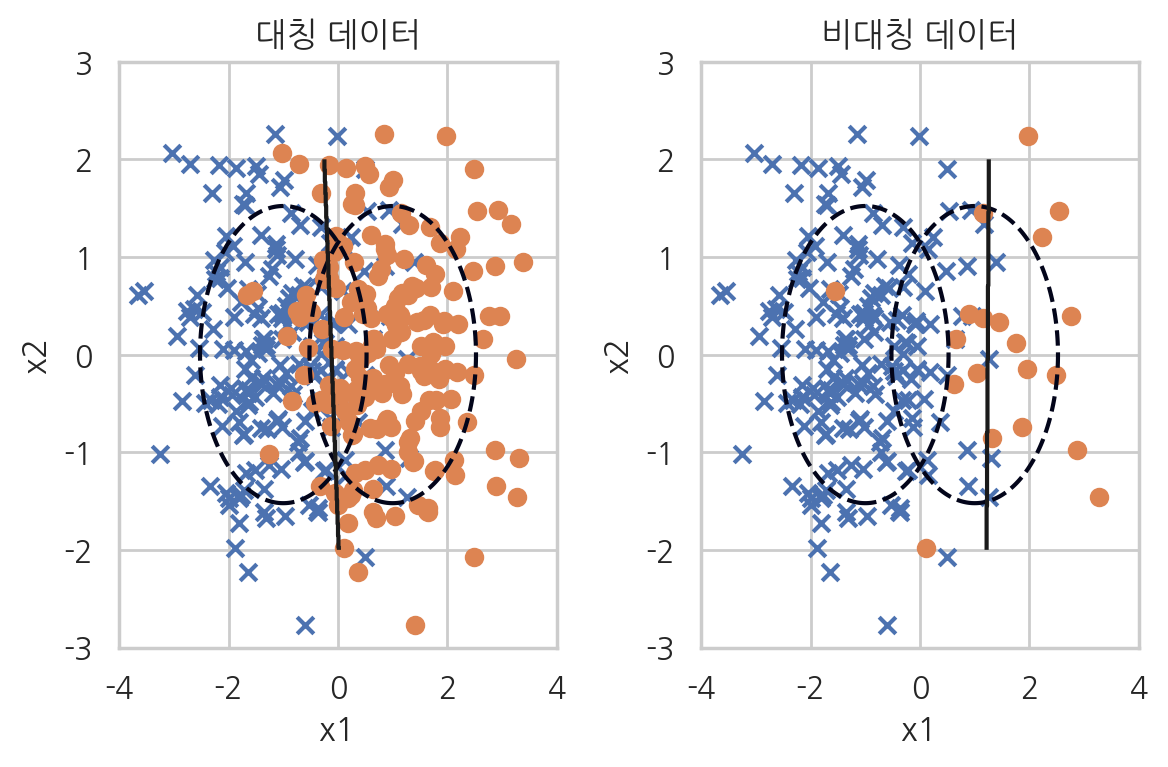

In [31]:
plt.subplot(121)
model1, X1, y1, y_pred_1 = classification_result(200, 200, "대칭 데이터")

plt.subplot(122)
model2, X2, y2, y_pred_2 = classification_result(200, 20, "비대칭 데이터")

plt.tight_layout()
plt.show() ; 

### classification report

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print("=== 균형 데이터 ===")
print(classification_report(y1, y_pred_1))
print(confusion_matrix(y1, y_pred_1))

=== 균형 데이터 ===
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       200
         1.0       0.84      0.86      0.85       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

[[166  34]
 [ 27 173]]


In [37]:
print("=== 불균형 데이터 ===")
print(classification_report(y2, y_pred_2))
print(confusion_matrix(y2, y_pred_2))

=== 불균형 데이터 ===
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220

[[196   4]
 [  8  12]]


In [53]:
c_mat = confusion_matrix(y2, y_pred_2)
c_mat

array([[196,   4],
       [  8,  12]], dtype=int64)

In [54]:
class_0_recall = c_mat[0][0] / c_mat[0, :].sum()
class_0_recall

0.98

In [56]:
c_mat = confusion_matrix(y2, y_pred_2, labels=np.array([1.0, 0.0]))
c_mat

array([[ 12,   8],
       [  4, 196]], dtype=int64)

In [57]:
class_1_recall = c_mat[0][0] / c_mat[0, :].sum()
class_1_recall

0.6

### roc curve
- 비대칭 데이터의 전체 acc는 높지만, recall, fall-out score가 현저히 낮다.

In [58]:
from sklearn.metrics import roc_curve

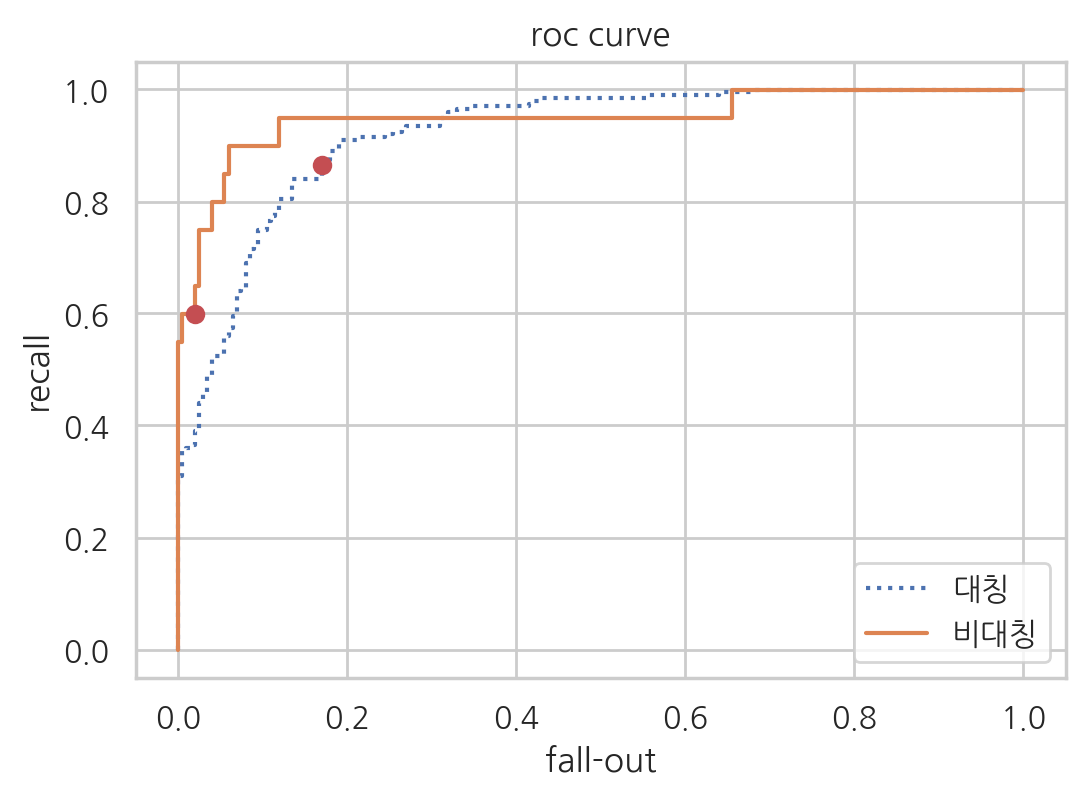

In [59]:
fpr1, tpr1, thr1 = roc_curve(y1, model1.decision_function(X1))
fpr2, tpr2, thr2 = roc_curve(y2, model2.decision_function(X2))

c1 = confusion_matrix(y1, y_pred_1, labels=[1, 0])
c2 = confusion_matrix(y2, y_pred_2, labels=[1, 0])
# recall
r1 = c1[0, 0] / (c1[0, 0] + c1[0, 1])
r2 = c2[0, 0] / (c2[0, 0] + c2[0, 1])
# fall-out
f1 = c1[1, 0] / (c1[1, 0] + c1[1, 1])
f2 = c2[1, 0] / (c2[1, 0] + c2[1, 1])

plt.plot(fpr1, tpr1, ":", label="대칭")
plt.plot(fpr2, tpr2, "-", label="비대칭")
plt.plot([f1], [r1], "ro")
plt.plot([f2], [r2], "ro")
plt.xlabel("fall-out")
plt.ylabel("recall")
plt.title("roc curve")
plt.legend()
plt.show() ; 

In [11]:
test_1 = np.array([1, 2, 3])
test_2 = np.array([4, 5, 6])

test_1, test_2

(array([1, 2, 3]), array([4, 5, 6]))

In [12]:
np.hstack([test_1, test_2])

array([1, 2, 3, 4, 5, 6])

In [13]:
np.vstack([test_1, test_2])

array([[1, 2, 3],
       [4, 5, 6]])

In [21]:
np.dstack([test_1, test_2])

array([[[1, 4],
        [2, 5],
        [3, 6]]])

In [22]:
np.dstack([test_1, test_2]).shape

(1, 3, 2)

In [24]:
np.c_[test_1, test_2]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [18]:
np.r_[test_1, test_2]

array([1, 2, 3, 4, 5, 6])

## 불균형 데이터 처리 패키지

In [1]:
!conda list "^im"

# packages in environment at C:\DS\Anaconda3\envs\dev_env:
#
# Name                    Version                   Build  Channel
imbalanced-learn          0.12.2                   pypi_0    pypi


In [4]:
from imblearn import under_sampling 

In [67]:
[c for c in dir(under_sampling) if c.islower() == False]

['AllKNN',
 'ClusterCentroids',
 'CondensedNearestNeighbour',
 'EditedNearestNeighbours',
 'InstanceHardnessThreshold',
 'NearMiss',
 'NeighbourhoodCleaningRule',
 'OneSidedSelection',
 'RandomUnderSampler',
 'RepeatedEditedNearestNeighbours',
 'TomekLinks']

In [69]:
n0 = 200 ; n1 = 20
rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])

In [72]:
rv1, rv2

(<scipy.stats._multivariate.multivariate_normal_frozen at 0x18d92cb5e10>,
 <scipy.stats._multivariate.multivariate_normal_frozen at 0x18d92cb7f40>)

In [73]:
X0 = rv1.rvs(n0, random_state=0)
X1 = rv2.rvs(n1, random_state=0)

In [76]:
X0.shape, X1.shape

((200, 2), (20, 2))

In [77]:
x_imb = np.vstack([X0, X1])
y_imb = np.hstack([np.zeros(n0), np.ones(n1)])

In [79]:
x_imb.shape, y_imb.shape

((220, 2), (220,))

In [80]:
y_imb

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [81]:
x1min = -4 ; x1max = 4
x2min = -2 ; x2max = 2
xx1 = np.linspace(x1min, x1max, 1000)
xx2 = np.linspace(x2min, x2max, 1000)
X1, X2 = np.meshgrid(xx1, xx2)

In [85]:
X1[:2]

array([[-4.        , -3.99199199, -3.98398398, ...,  3.98398398,
         3.99199199,  4.        ],
       [-4.        , -3.99199199, -3.98398398, ...,  3.98398398,
         3.99199199,  4.        ]])

In [86]:
X2[:2]

array([[-2.      , -2.      , -2.      , ..., -2.      , -2.      ,
        -2.      ],
       [-1.995996, -1.995996, -1.995996, ..., -1.995996, -1.995996,
        -1.995996]])

In [117]:
def classification_result2(X, y, title="") : 
    
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05],
                linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05],
                linestyles="dashed")
    
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y==0, 0], X[y==0, 1], marker="x", label="class 0")
    plt.scatter(X[y==1 ,0], X[y==1, 1], marker="o", label="class 1")
    plt.contour(X1, X2, Y, color="k", levels=[0.5])
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(fontsize=8)
    plt.title(title)
    
    return model

## Under-sampler

### Random Under-sampler

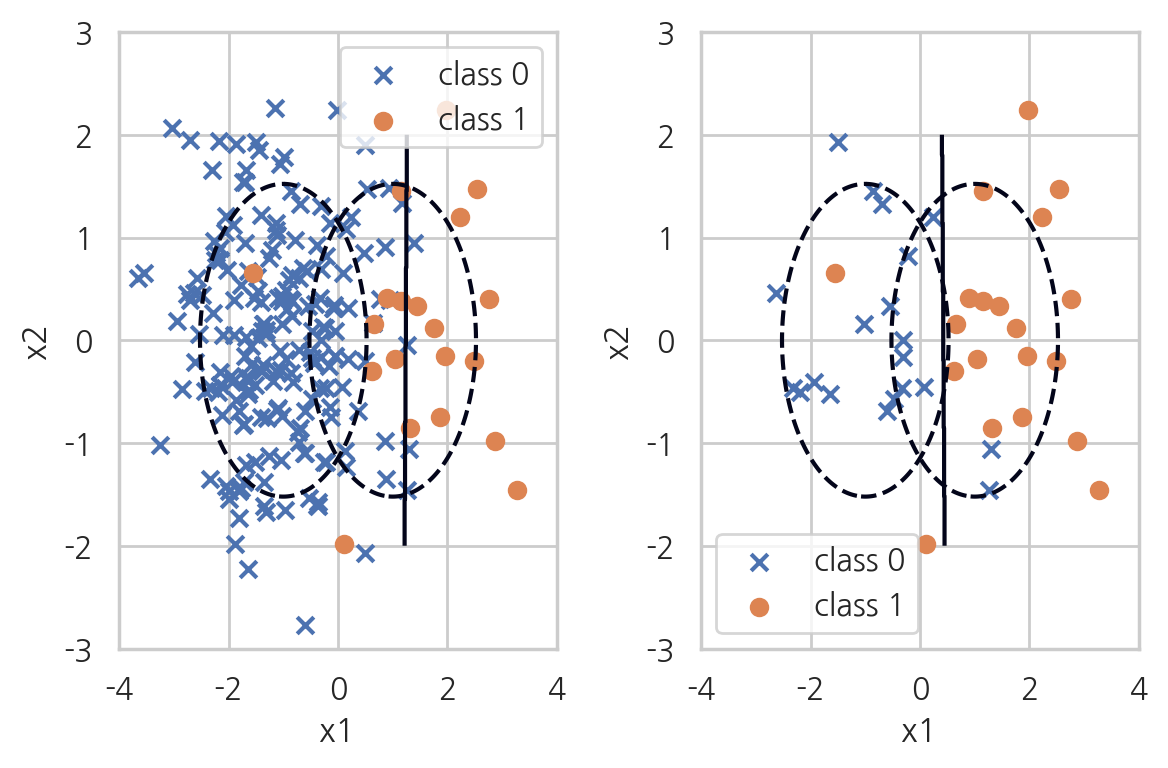

In [108]:
# 비대칭 데이터를 넣고 fit_resample 하면 다수 클래스 데이터가 랜덤하게 제거된다.
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_resample(x_imb, y_imb)

plt.subplot(121)
model_imb = classification_result2(x_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

plt.tight_layout()
plt.show() ; 

### RandomUnderSampler()로 변화된 데이터

In [104]:
x_imb[y_imb==0].shape, x_imb[y_imb==1].shape

((200, 2), (20, 2))

In [103]:
X_samp[y_samp==0].shape, X_samp[y_samp==1].shape

((20, 2), (20, 2))

### classification report
- RandomUnderSampler() 데이터로 훈련한 모형의 recall 값이 더 나아졌다.

In [109]:
# 비대칭 데이터 훈련 모형

print(classification_report(y_imb, model_imb.predict(x_imb)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220



In [107]:
# RandomUnderSampler 데이터 훈련 모형

print(classification_report(y_imb, model_samp.predict(x_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       200
         1.0       0.51      0.90      0.65        20

    accuracy                           0.91       220
   macro avg       0.75      0.91      0.80       220
weighted avg       0.95      0.91      0.92       220



In [92]:
test_1 = X1[:5, :10]
test_2 = X2[:5, :10]

test_1, test_2

(array([[-4.        , -3.99199199, -3.98398398, -3.97597598, -3.96796797,
         -3.95995996, -3.95195195, -3.94394394, -3.93593594, -3.92792793],
        [-4.        , -3.99199199, -3.98398398, -3.97597598, -3.96796797,
         -3.95995996, -3.95195195, -3.94394394, -3.93593594, -3.92792793],
        [-4.        , -3.99199199, -3.98398398, -3.97597598, -3.96796797,
         -3.95995996, -3.95195195, -3.94394394, -3.93593594, -3.92792793],
        [-4.        , -3.99199199, -3.98398398, -3.97597598, -3.96796797,
         -3.95995996, -3.95195195, -3.94394394, -3.93593594, -3.92792793],
        [-4.        , -3.99199199, -3.98398398, -3.97597598, -3.96796797,
         -3.95995996, -3.95195195, -3.94394394, -3.93593594, -3.92792793]]),
 array([[-2.        , -2.        , -2.        , -2.        , -2.        ,
         -2.        , -2.        , -2.        , -2.        , -2.        ],
        [-1.995996  , -1.995996  , -1.995996  , -1.995996  , -1.995996  ,
         -1.995996  , -1.99599

In [93]:
np.array([test_1.ravel(), test_2.ravel()])

array([[-4.        , -3.99199199, -3.98398398, -3.97597598, -3.96796797,
        -3.95995996, -3.95195195, -3.94394394, -3.93593594, -3.92792793,
        -4.        , -3.99199199, -3.98398398, -3.97597598, -3.96796797,
        -3.95995996, -3.95195195, -3.94394394, -3.93593594, -3.92792793,
        -4.        , -3.99199199, -3.98398398, -3.97597598, -3.96796797,
        -3.95995996, -3.95195195, -3.94394394, -3.93593594, -3.92792793,
        -4.        , -3.99199199, -3.98398398, -3.97597598, -3.96796797,
        -3.95995996, -3.95195195, -3.94394394, -3.93593594, -3.92792793,
        -4.        , -3.99199199, -3.98398398, -3.97597598, -3.96796797,
        -3.95995996, -3.95195195, -3.94394394, -3.93593594, -3.92792793],
       [-2.        , -2.        , -2.        , -2.        , -2.        ,
        -2.        , -2.        , -2.        , -2.        , -2.        ,
        -1.995996  , -1.995996  , -1.995996  , -1.995996  , -1.995996  ,
        -1.995996  , -1.995996  , -1.995996  , -1.

## TomekLinks()

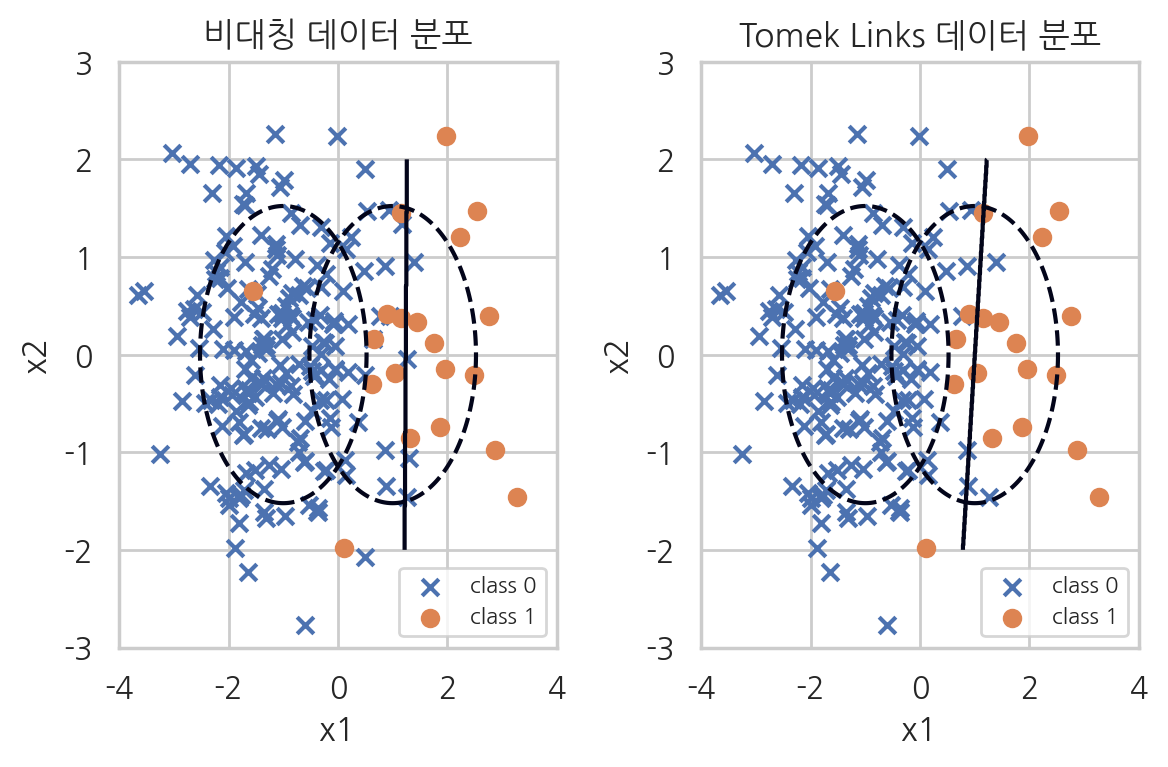

In [118]:
X_tomek, y_tomek = TomekLinks(sampling_strategy="auto").fit_resample(x_imb, y_imb)

plt.subplot(121)
model_imb = classification_result2(x_imb, y_imb, "비대칭 데이터 분포")

plt.subplot(122)
model_tomek = classification_result2(X_tomek, y_tomek, "Tomek Links 데이터 분포")

plt.tight_layout()
plt.show() ; 

In [114]:
X_tomek.shape, y_tomek.shape

((212, 2), (212,))

In [115]:
print(classification_report(y_imb, model_imb.predict(x_imb)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220



In [116]:
print(classification_report(y_imb, model_tomek.predict(x_imb)))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       200
         1.0       0.70      0.70      0.70        20

    accuracy                           0.95       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.95      0.95      0.95       220



### sampling_strategy 파라미터
- tomek link의 제거 데이터 기준을 바꿀 수 있다.
   - not majority : 다수 클래스 데이터 제외 후 나머지 클래스에서 resampling 
   - not minority : 소수 클래스 데이터 제외 후 나머지 클래스에서 resampling
   - all : 모든 클래스에서 resampling
- 소수 클래스 데이터를 삭제하는 방식보다는 다수 클래스 데이터를 삭제한 경우의 지표가 전반적으로 상승된다.

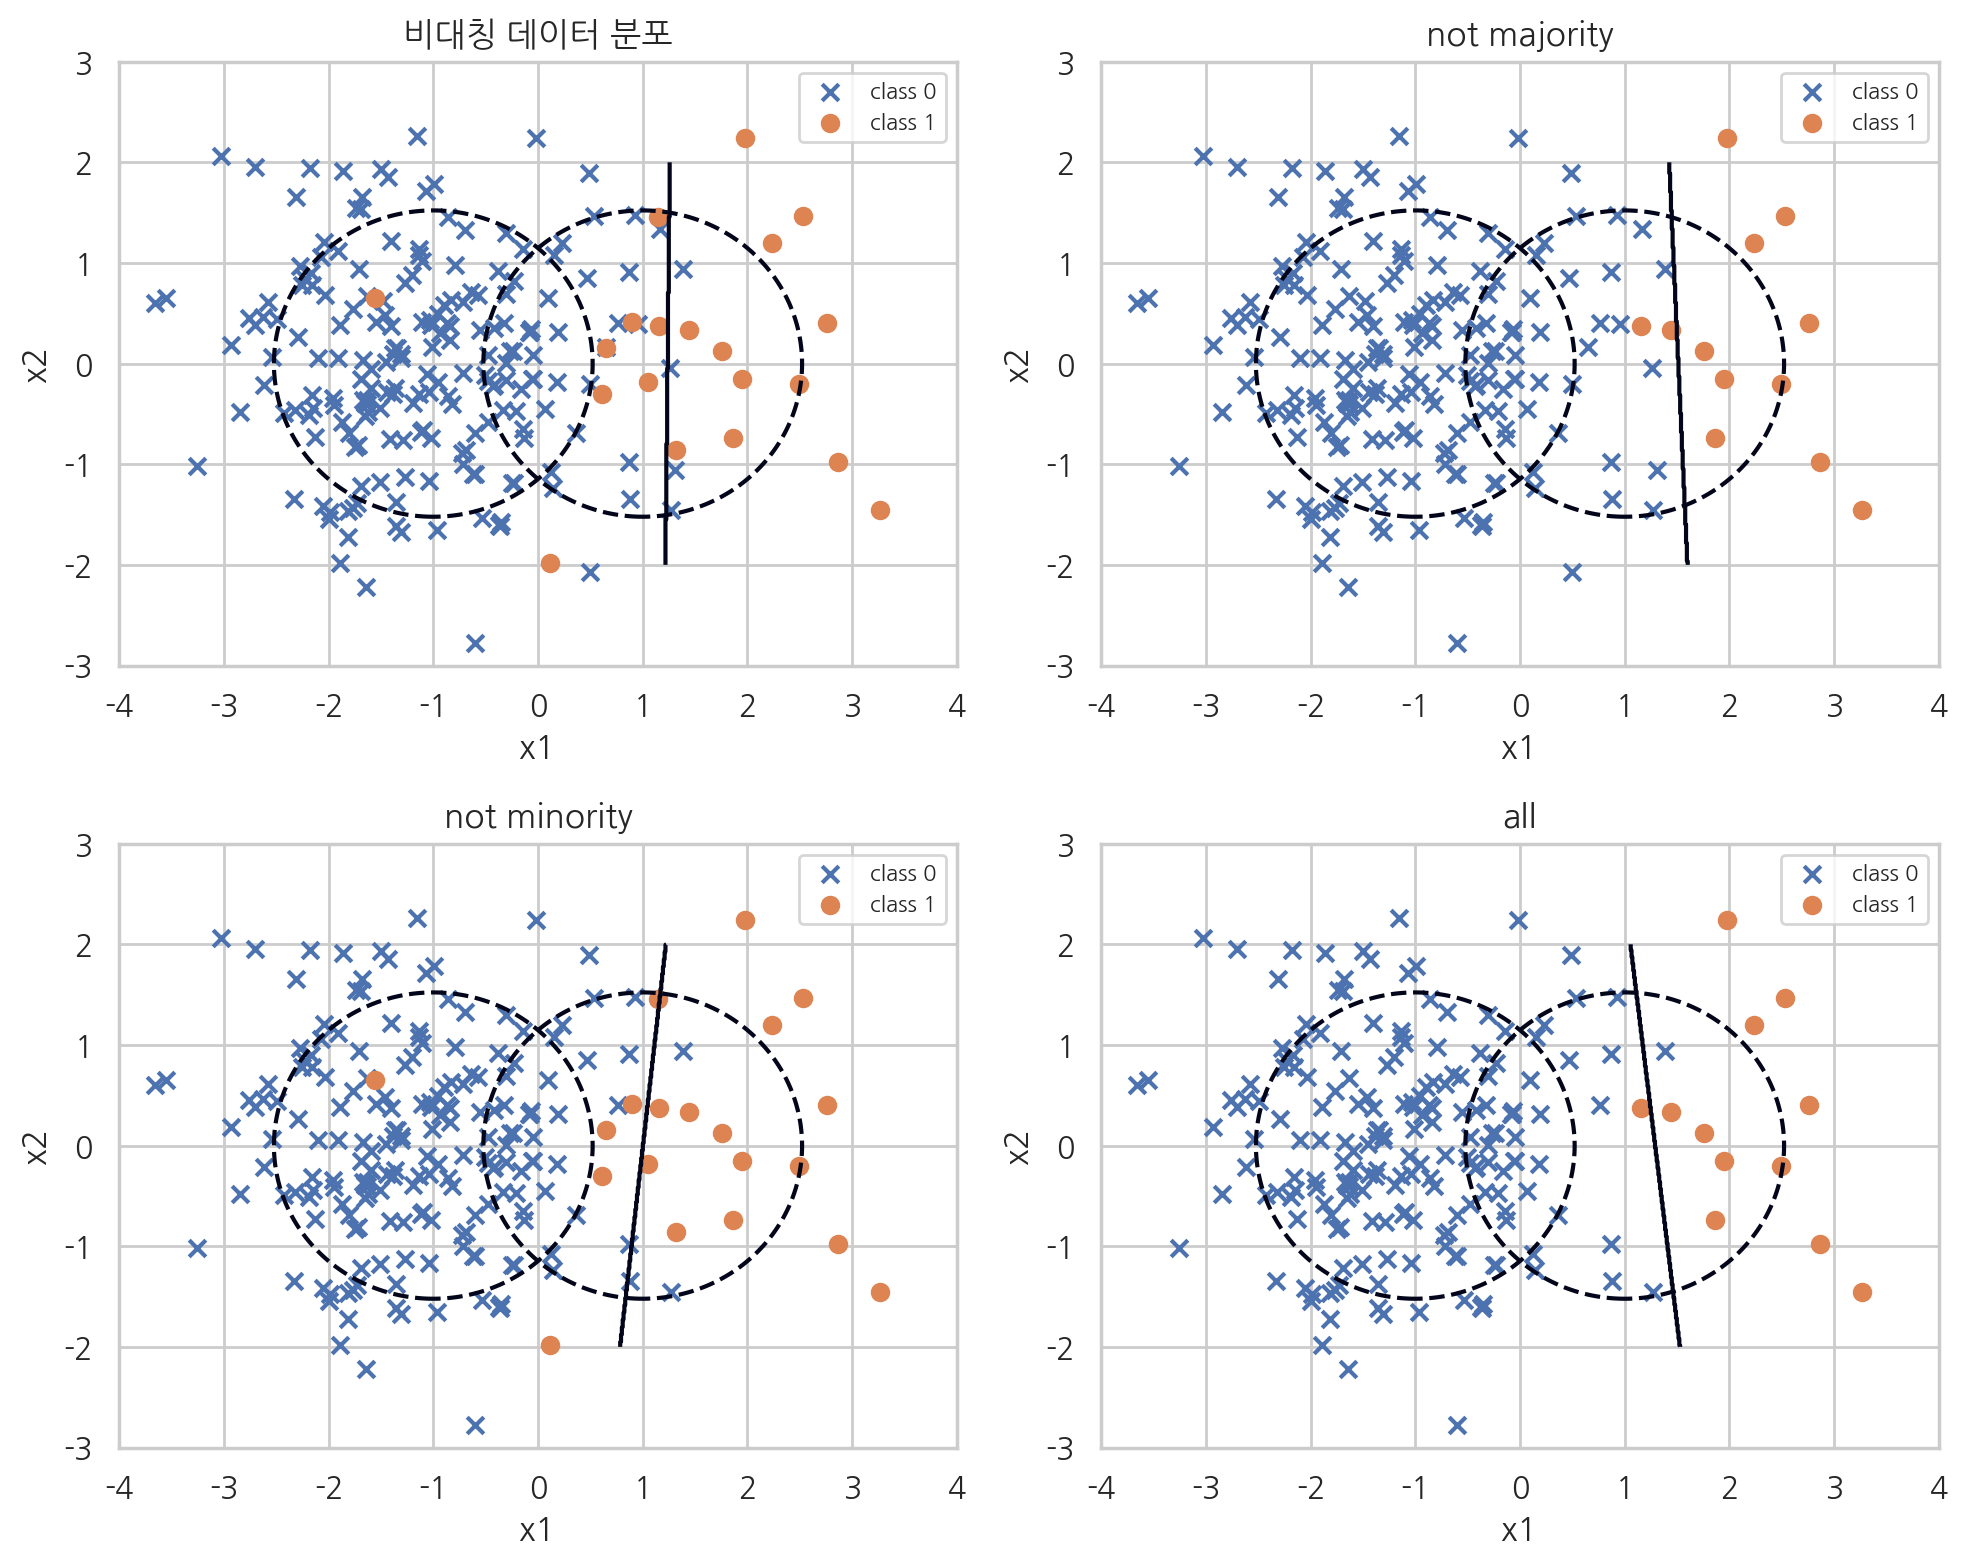

In [131]:
params = ["not majority", "not minority", "all"]
tomek_models = []

plt.figure(figsize=(10, 8))
N = 2
M = 2
for i in range(N) : 
    for j in range(M) : 
        k = i * M + j + 1
        if k == 1 : 
            plt.subplot(N, M, k)
            model_imb = classification_result2(x_imb, y_imb, "비대칭 데이터 분포")
            tomek_models.append(model_imb)
        else :
            plt.subplot(N, M, k)
            X_tomek, y_tomek = TomekLinks(sampling_strategy=params[k-2])\
            .fit_resample(x_imb, y_imb)
            model_tomek = classification_result2(X_tomek, y_tomek, params[k-2])
            tomek_models.append(model_tomek)

plt.tight_layout()
plt.show() ; 

In [132]:
print(classification_report(y_imb, tomek_models[0].predict(x_imb)))
print(classification_report(y_imb, tomek_models[1].predict(x_imb)))
print(classification_report(y_imb, tomek_models[2].predict(x_imb)))
print(classification_report(y_imb, tomek_models[3].predict(x_imb)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       200
         1.0       1.00      0.50      0.67        20

    accuracy                           0.95       220
   macro avg       0.98      0.75      0.82       220
weighted avg       0.96      0.95      0.95       220

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       200
         1.0       0.70      0.70      0.70        20

    accuracy                           0.95       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.95      0.95      0.95       220

              preci

### CondencedNearestNeighbor()
- 소수 클래스의 데이터와 가깝지 않은 데이터는 제거 된다.
- n_neighbor 파라미터 값을 증가시키면, 오히려 비대칭 데이터가 더 심해질 수 있다.

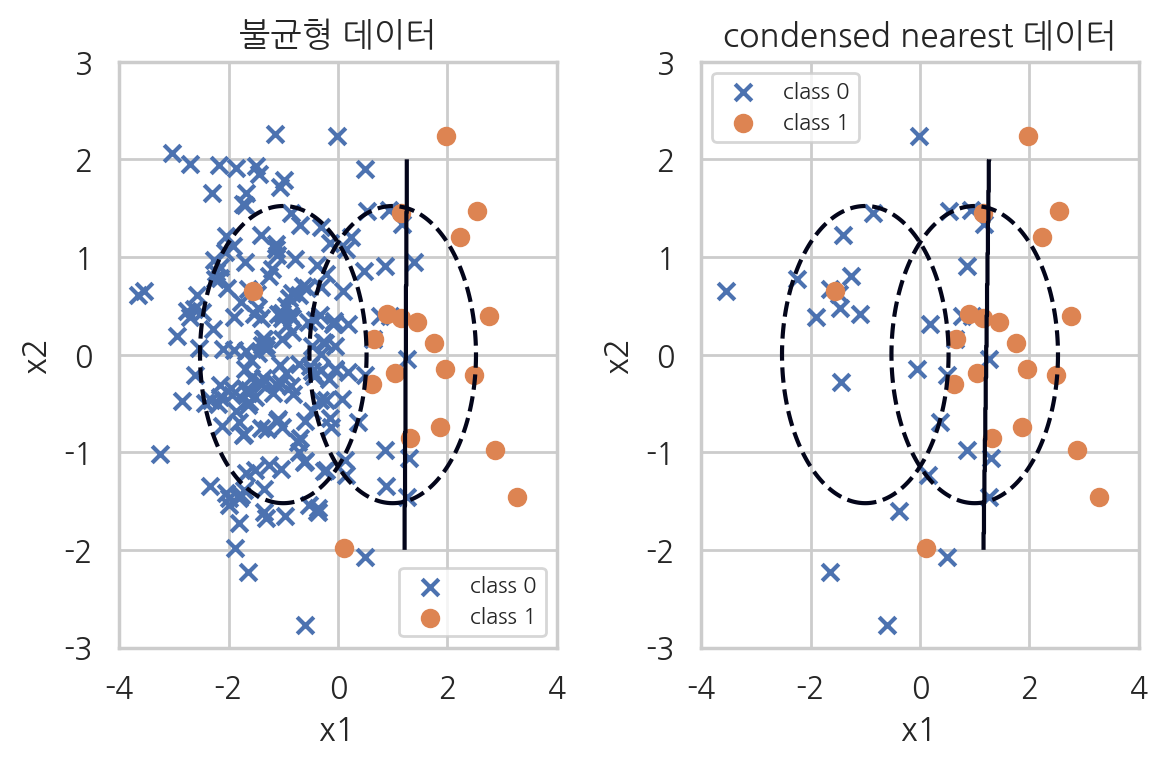

In [135]:
X_cnn, y_cnn = CondensedNearestNeighbour(random_state=0).fit_resample(x_imb, y_imb)

plt.subplot(121)
model_imb = classification_result2(x_imb, y_imb, "불균형 데이터")

plt.subplot(122)
model_cnn = classification_result2(X_cnn, y_cnn, "condensed nearest 데이터")

plt.tight_layout()
plt.show() ; 

In [137]:
print(classification_report(y_imb, model_imb.predict(x_imb)))
print(classification_report(y_imb, model_cnn.predict(x_imb)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220



In [145]:
from collections import Counter

In [147]:
print(sorted(Counter(y_cnn).items()))

[(0.0, 32), (1.0, 20)]


In [148]:
print(sorted(Counter(y_imb).items()))

[(0.0, 200), (1.0, 20)]


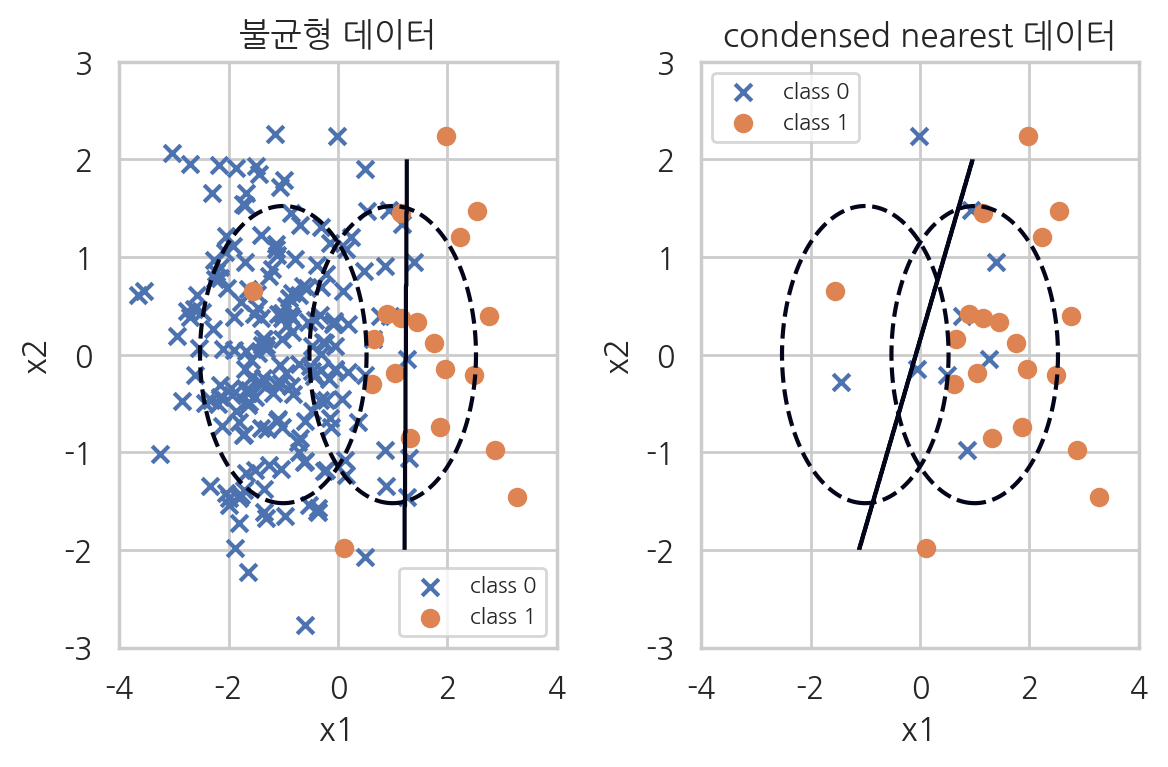

In [152]:
X_cnn, y_cnn = CondensedNearestNeighbour(n_neighbors=2, 
                                         random_state=0).fit_resample(x_imb, y_imb)

plt.subplot(121)
model_imb = classification_result2(x_imb, y_imb, "불균형 데이터")

plt.subplot(122)
model_cnn = classification_result2(X_cnn, y_cnn, "condensed nearest 데이터")

plt.tight_layout()
plt.show() ; 

### OneSidedSelection()
- tomek link + condensed nearest neighbours
   - tomek link 중에서 다수 클래스 제거
   - 나머지 데이터 중 condensed 방법으로 소수 클래스와 가깝지 않은 데이터들을 제거

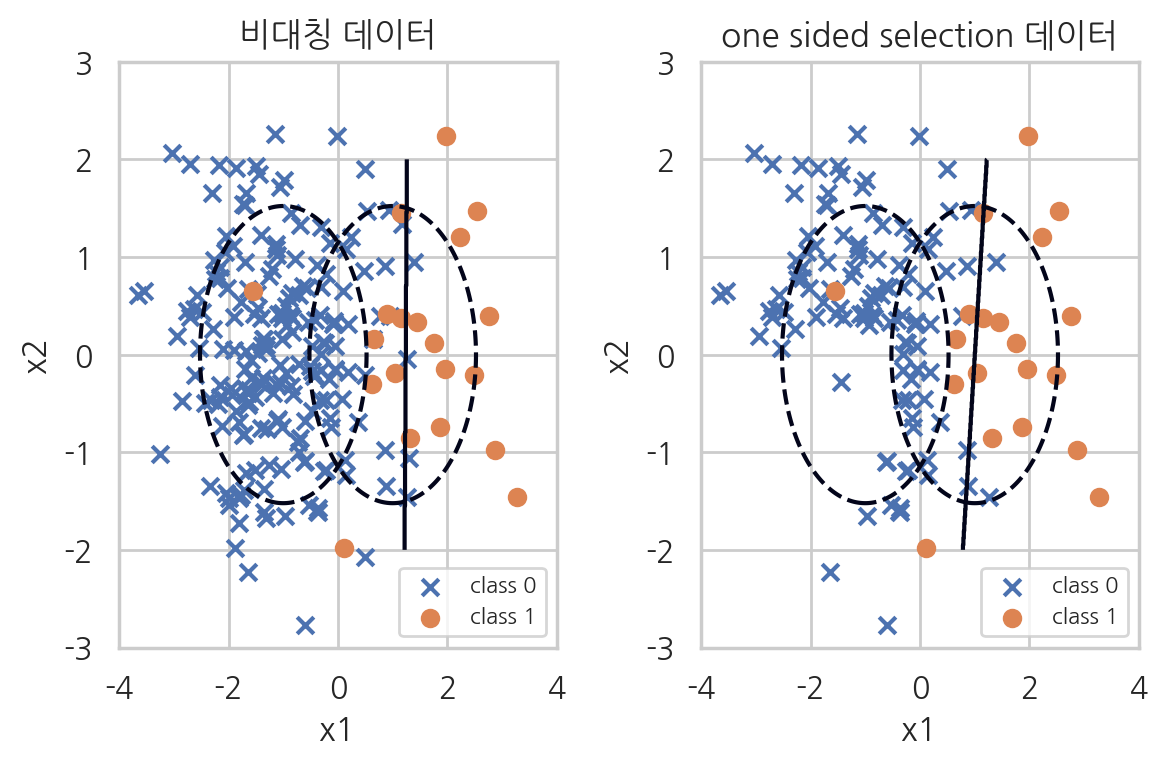

In [153]:
X_oss, y_oss = OneSidedSelection(random_state=0).fit_resample(x_imb, y_imb)

plt.subplot(121)
model_imb = classification_result2(x_imb, y_imb, "비대칭 데이터")

plt.subplot(122)
model_oss = classification_result2(X_oss, y_oss, "one sided selection 데이터")

plt.tight_layout()
plt.show() ; 

In [156]:
print(classification_report(y_imb, model_imb.predict(x_imb)))
print(classification_report(y_imb, model_oss.predict(x_imb)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       200
         1.0       0.70      0.70      0.70        20

    accuracy                           0.95       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.95      0.95      0.95       220



### EditedNearestNeighbours()

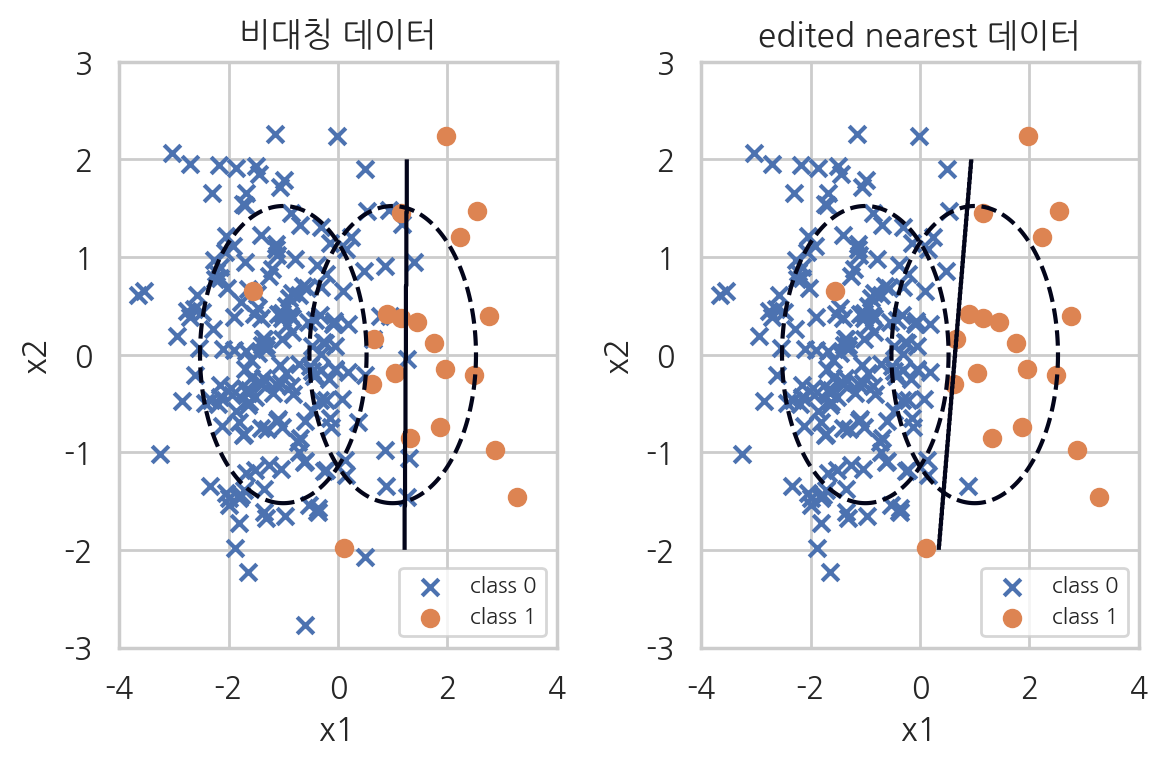

In [158]:
X_enn, y_enn = EditedNearestNeighbours().fit_resample(x_imb, y_imb)

plt.subplot(121)
model_imb = classification_result2(x_imb, y_imb, "비대칭 데이터")

plt.subplot(122)
model_enn = classification_result2(X_enn, y_enn, "edited nearest 데이터")

plt.tight_layout()
plt.show() ; 

In [160]:
print(classification_report(y_imb, model_imb.predict(x_imb)))
print(classification_report(y_imb, model_enn.predict(x_imb)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       200
         1.0       0.59      0.85      0.69        20

    accuracy                           0.93       220
   macro avg       0.79      0.90      0.83       220
weighted avg       0.95      0.93      0.94       220



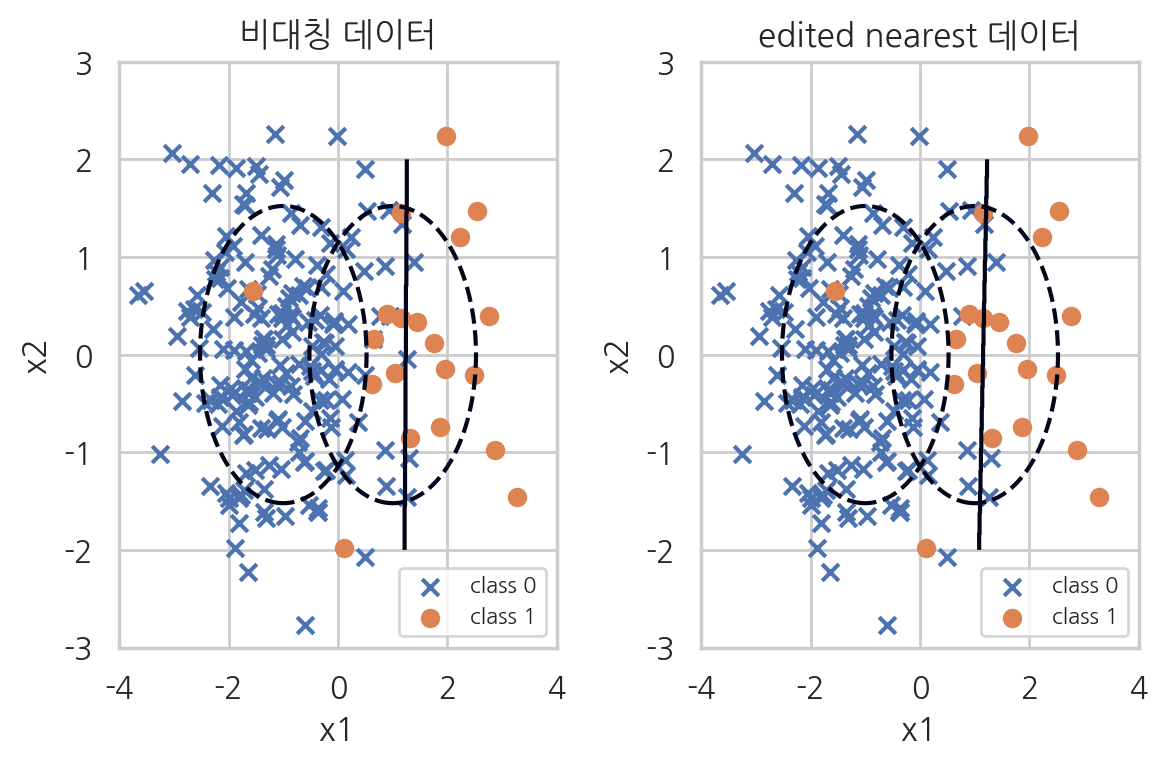

In [163]:
X_enn, y_enn = EditedNearestNeighbours(kind_sel="mode").fit_resample(x_imb, y_imb)

plt.subplot(121)
model_imb = classification_result2(x_imb, y_imb, "비대칭 데이터")

plt.subplot(122)
model_enn = classification_result2(X_enn, y_enn, "edited nearest 데이터")

plt.tight_layout()
plt.show() ; 

In [164]:
print(classification_report(y_imb, model_imb.predict(x_imb)))
print(classification_report(y_imb, model_enn.predict(x_imb)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220



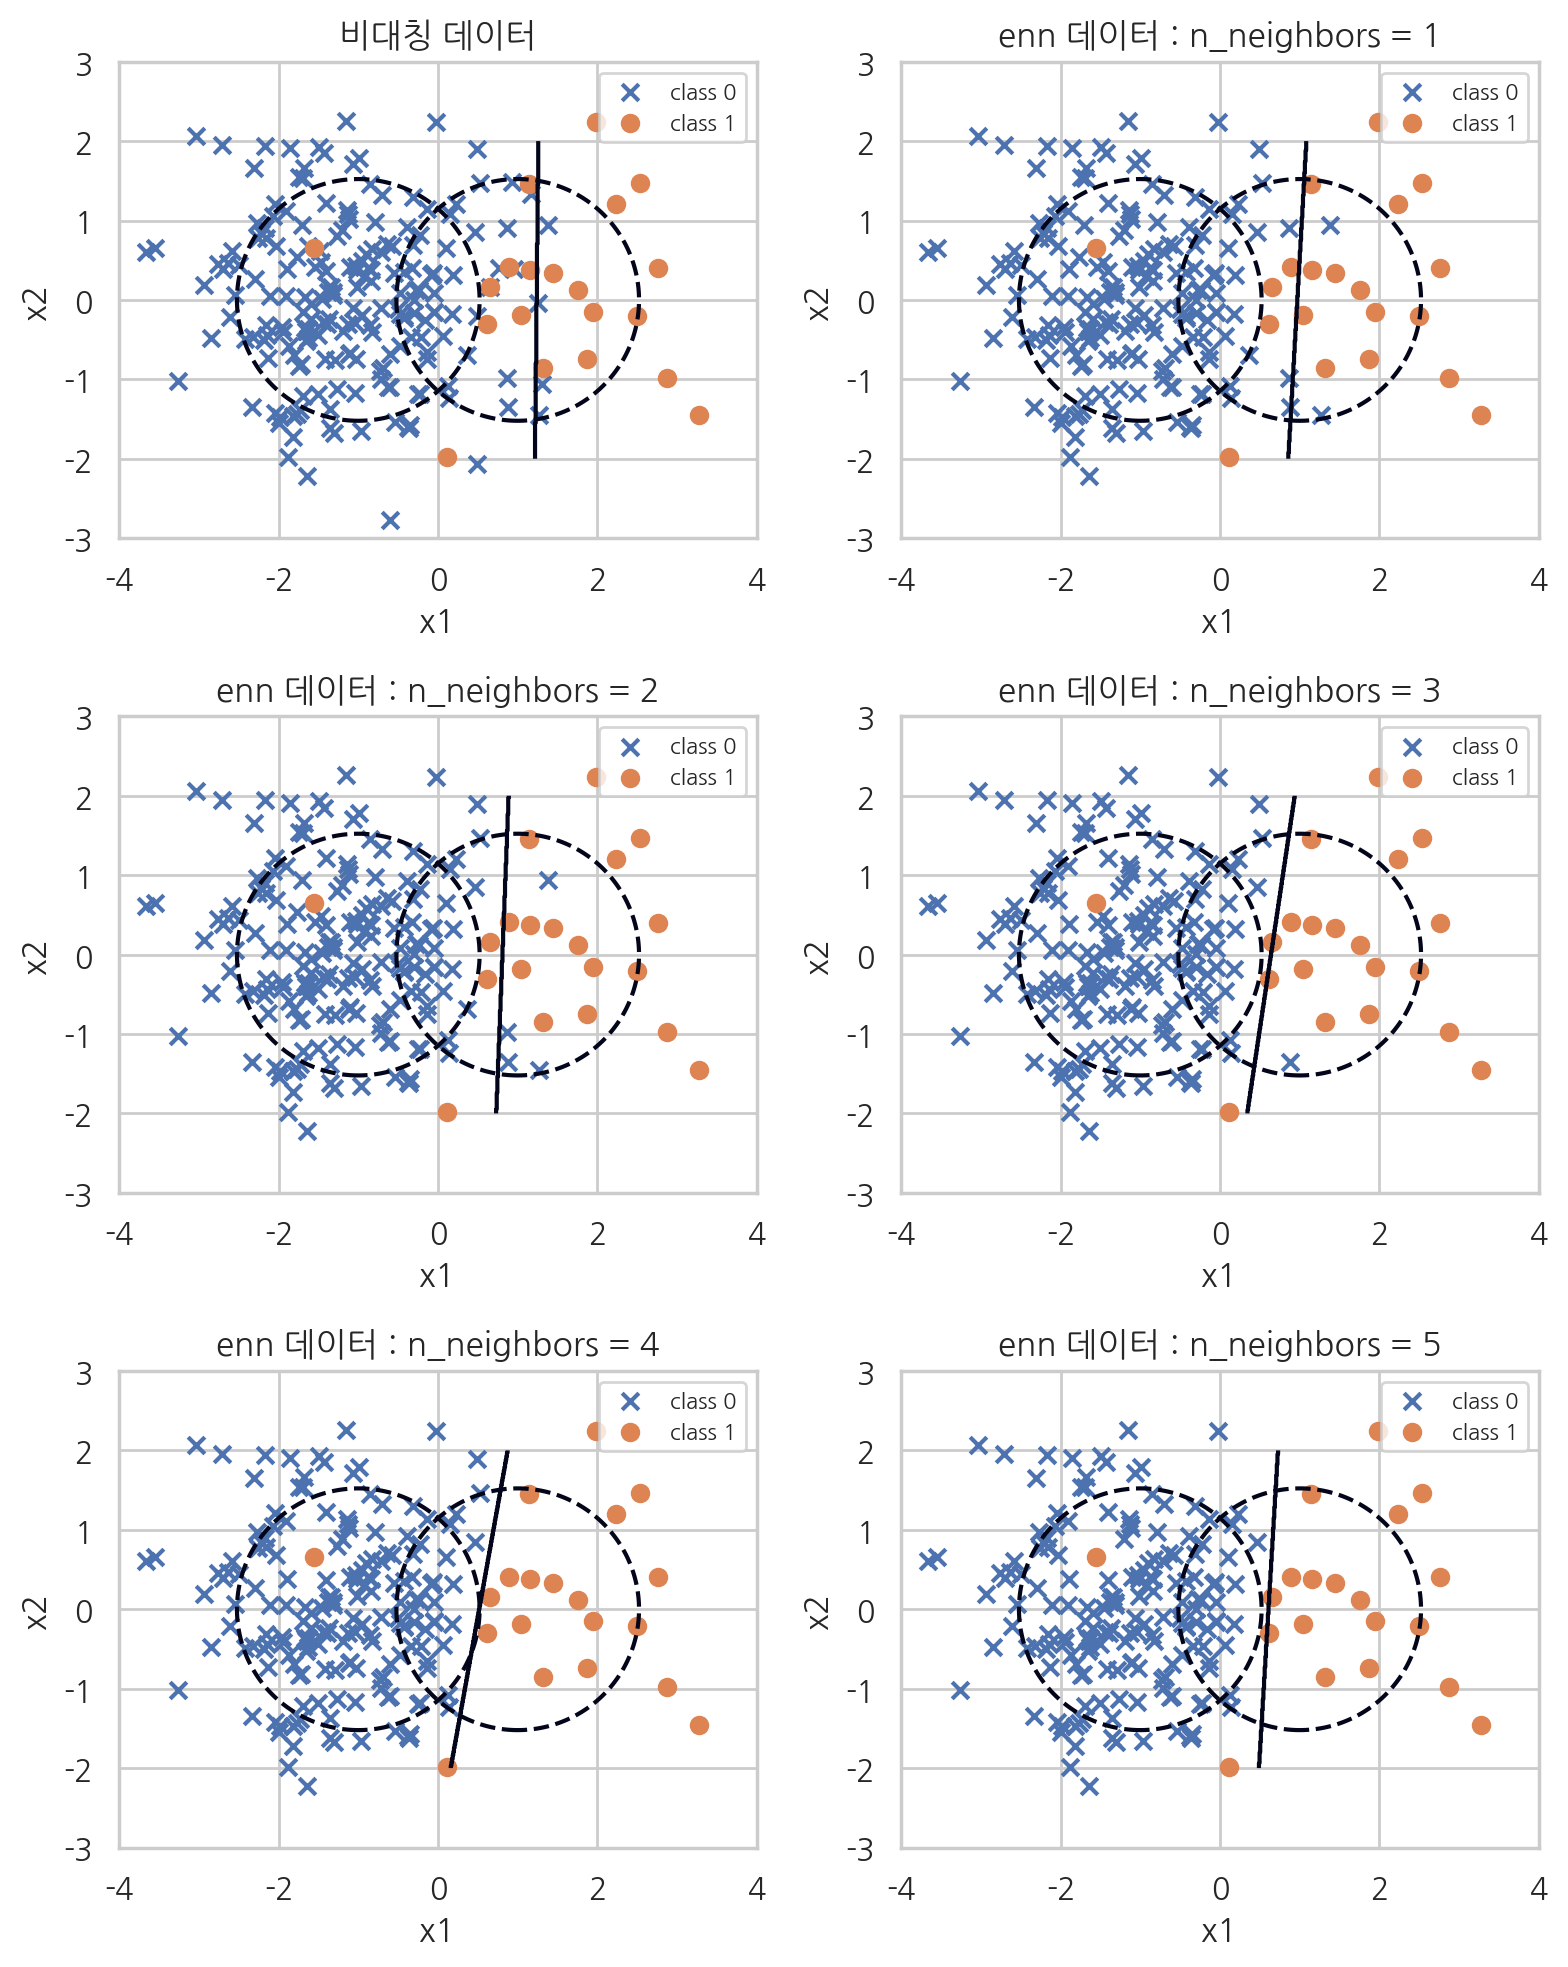

In [169]:
params = [1, 2, 3, 4, 5]

plt.figure(figsize=(8, 10))
N = 3
M = 2
for i in range(N) : 
    for j in range(M) : 
        k = i * M + j + 1
        if k == 1 : 
            plt.subplot(N, M, k)
            model_imb = classification_result2(x_imb, y_imb, "비대칭 데이터")
        else : 
            plt.subplot(N, M, k)
            X_enn, y_enn = EditedNearestNeighbours(n_neighbors=params[k-2])\
                           .fit_resample(x_imb, y_imb)
            model_enn = classification_result2(X_enn, y_enn, 
                           "enn 데이터 : n_neighbors = {}".format(params[k-2]))
plt.tight_layout()
plt.show() ; 

### NeighbourhoodCleaningRule()

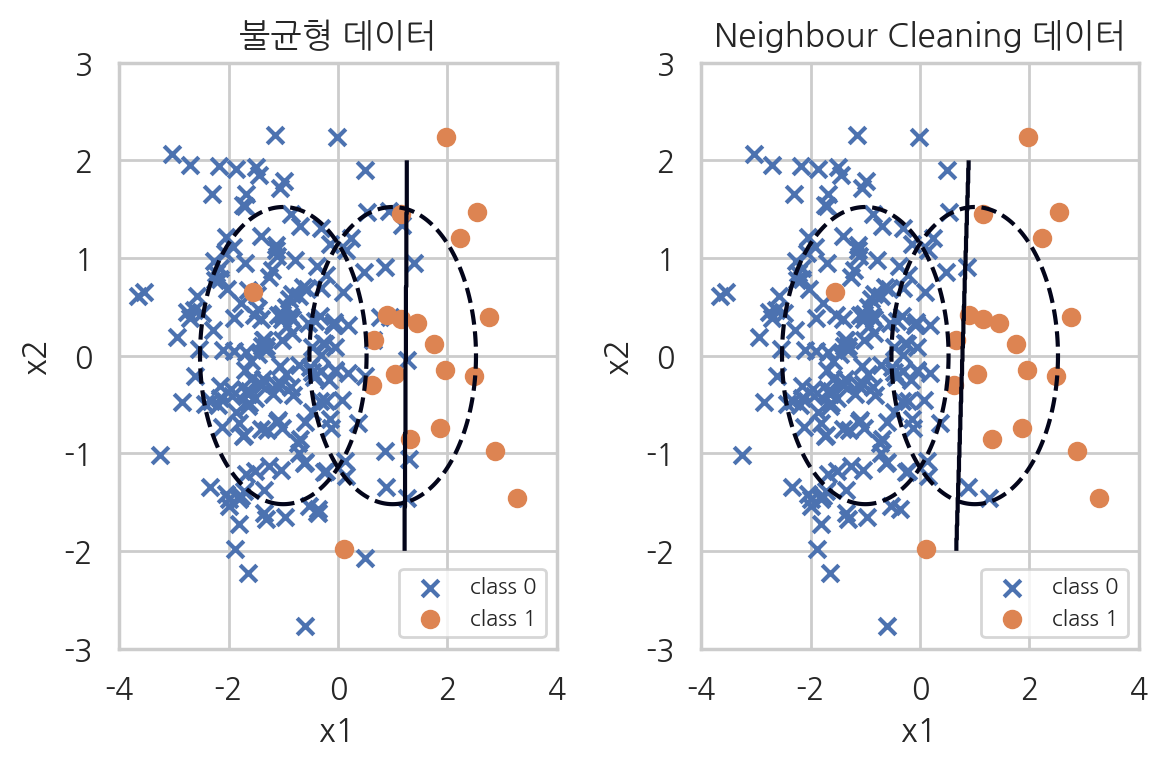

In [172]:
X_ncr, y_ncr = NeighbourhoodCleaningRule().fit_resample(x_imb, y_imb)

plt.subplot(121)
model_imb = classification_result2(x_imb, y_imb, "불균형 데이터")

plt.subplot(122)
model_ncr = classification_result2(X_ncr, y_ncr, "Neighbour Cleaning 데이터")

plt.tight_layout()
plt.show() ; 

In [174]:
print(classification_report(y_imb, model_imb.predict(x_imb)))
print(classification_report(y_imb, model_ncr.predict(x_imb)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       200
         1.0       0.62      0.80      0.70        20

    accuracy                           0.94       220
   macro avg       0.80      0.88      0.83       220
weighted avg       0.95      0.94      0.94       220



## Over-sampler

In [255]:
from imblearn.over_sampling import *

### RandomOverSampler()

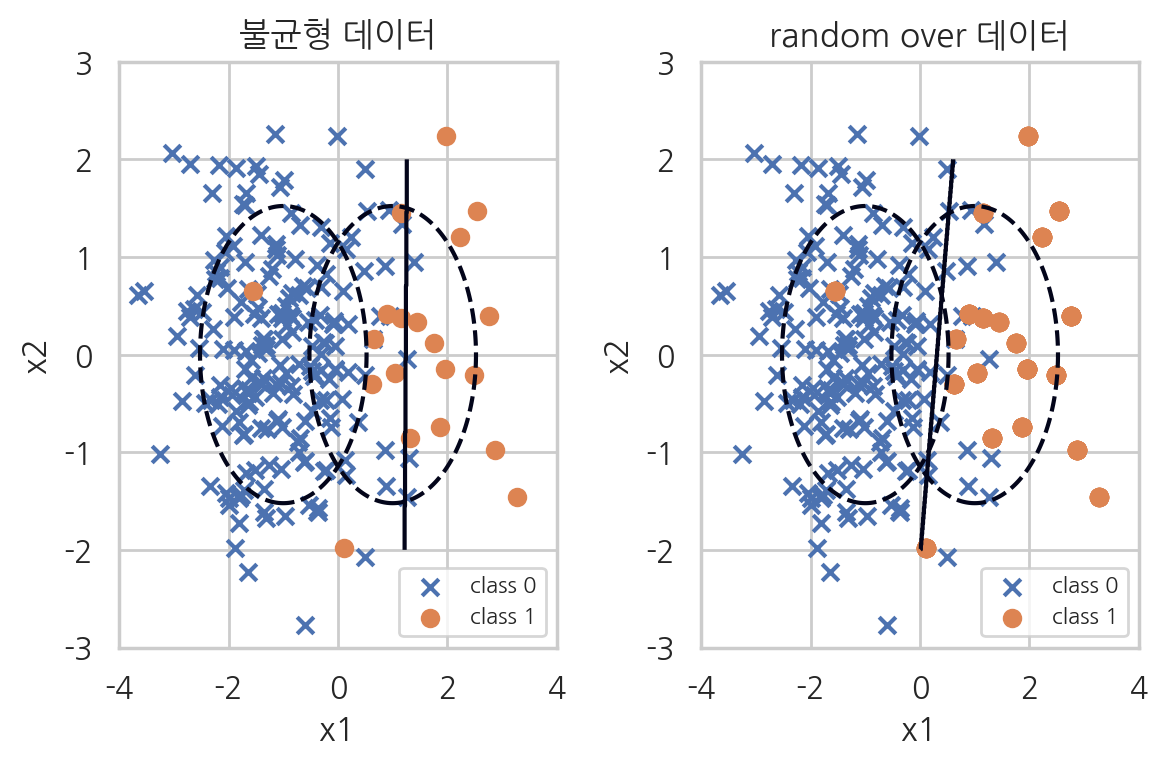

In [256]:
X_ros, y_ros = RandomOverSampler(random_state=0).fit_resample(x_imb, y_imb)

plt.subplot(121)
model_imb = classification_result2(x_imb, y_imb, "불균형 데이터")

plt.subplot(122)
model_ros = classification_result2(X_ros, y_ros, "random over 데이터")

plt.tight_layout()
plt.show() ; 

In [257]:
print("----------- 불균형 데이터 -----------")
print(classification_report(y_imb, model_imb.predict(x_imb)))

print("----------- ROS 데이터 -----------")
print(classification_report(y_imb, model_ros.predict(x_imb)))

----------- 불균형 데이터 -----------
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220

----------- ROS 데이터 -----------
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95       200
         1.0       0.51      0.95      0.67        20

    accuracy                           0.91       220
   macro avg       0.75      0.93      0.81       220
weighted avg       0.95      0.91      0.92       220



### ADASYN()

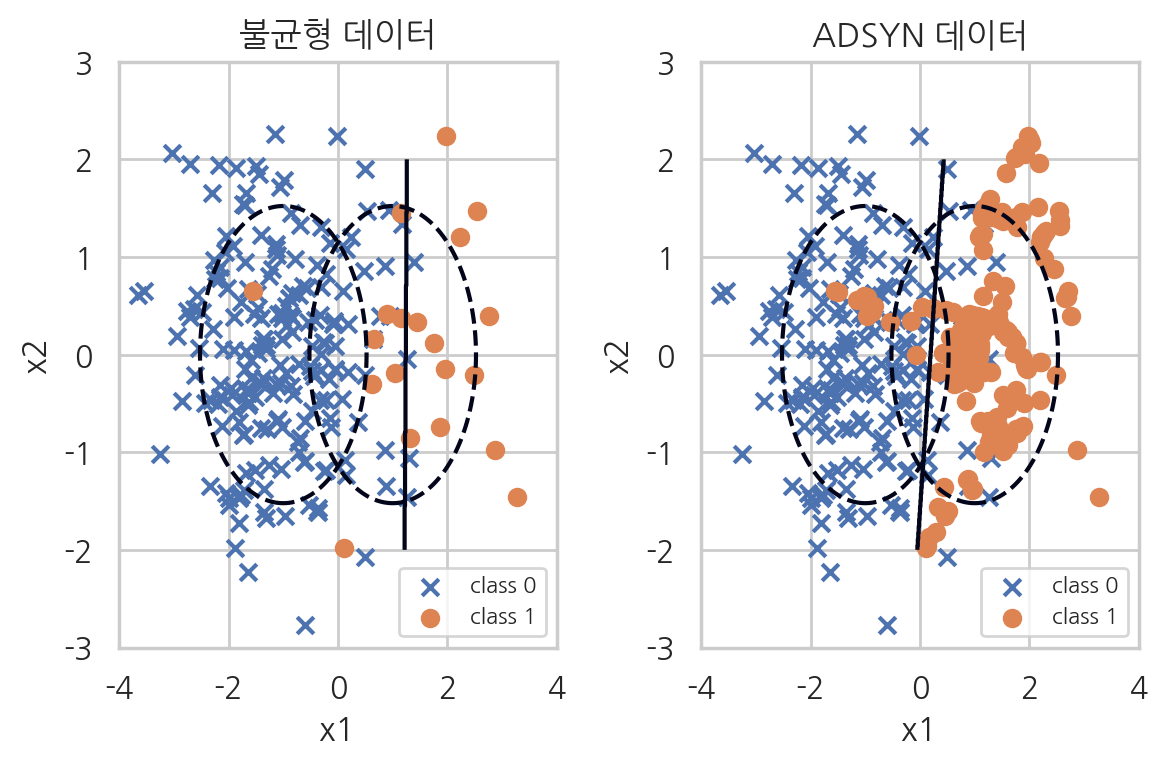

In [259]:
X_asn, y_asn = ADASYN(random_state=0).fit_resample(x_imb, y_imb)

plt.subplot(121)
model_imb = classification_result2(x_imb, y_imb, "불균형 데이터")

plt.subplot(122)
model_asn = classification_result2(X_asn, y_asn, "ADSYN 데이터")

plt.tight_layout()
plt.show() ; 

In [261]:
print("----------- 불균형 데이터 -----------")
print(classification_report(y_imb, model_imb.predict(x_imb)))

print("----------- ADASYN 데이터 -----------")
print(classification_report(y_imb, model_asn.predict(x_imb)))

----------- 불균형 데이터 -----------
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220

----------- ADASYN 데이터 -----------
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       200
         1.0       0.47      0.95      0.63        20

    accuracy                           0.90       220
   macro avg       0.73      0.92      0.79       220
weighted avg       0.95      0.90      0.91       220



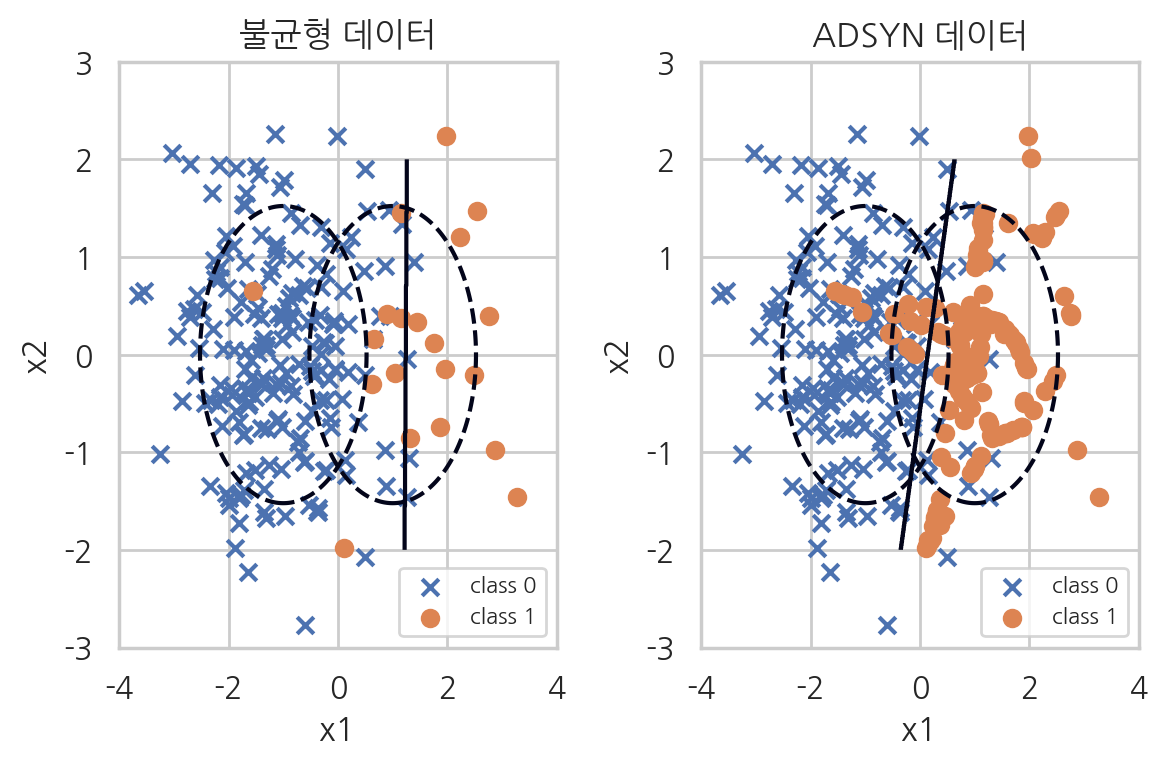

In [263]:
X_asn, y_asn = ADASYN(n_neighbors=3, random_state=0).fit_resample(x_imb, y_imb)

plt.subplot(121)
model_imb = classification_result2(x_imb, y_imb, "불균형 데이터")

plt.subplot(122)
model_asn = classification_result2(X_asn, y_asn, "ADSYN 데이터")

plt.tight_layout()
plt.show() ; 

In [264]:
print("----------- 불균형 데이터 -----------")
print(classification_report(y_imb, model_imb.predict(x_imb)))

print("----------- ADASYN 데이터 -----------")
print(classification_report(y_imb, model_asn.predict(x_imb)))

----------- 불균형 데이터 -----------
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220

----------- ADASYN 데이터 -----------
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       200
         1.0       0.47      0.95      0.63        20

    accuracy                           0.90       220
   macro avg       0.73      0.92      0.79       220
weighted avg       0.95      0.90      0.91       220



### SMOTE()

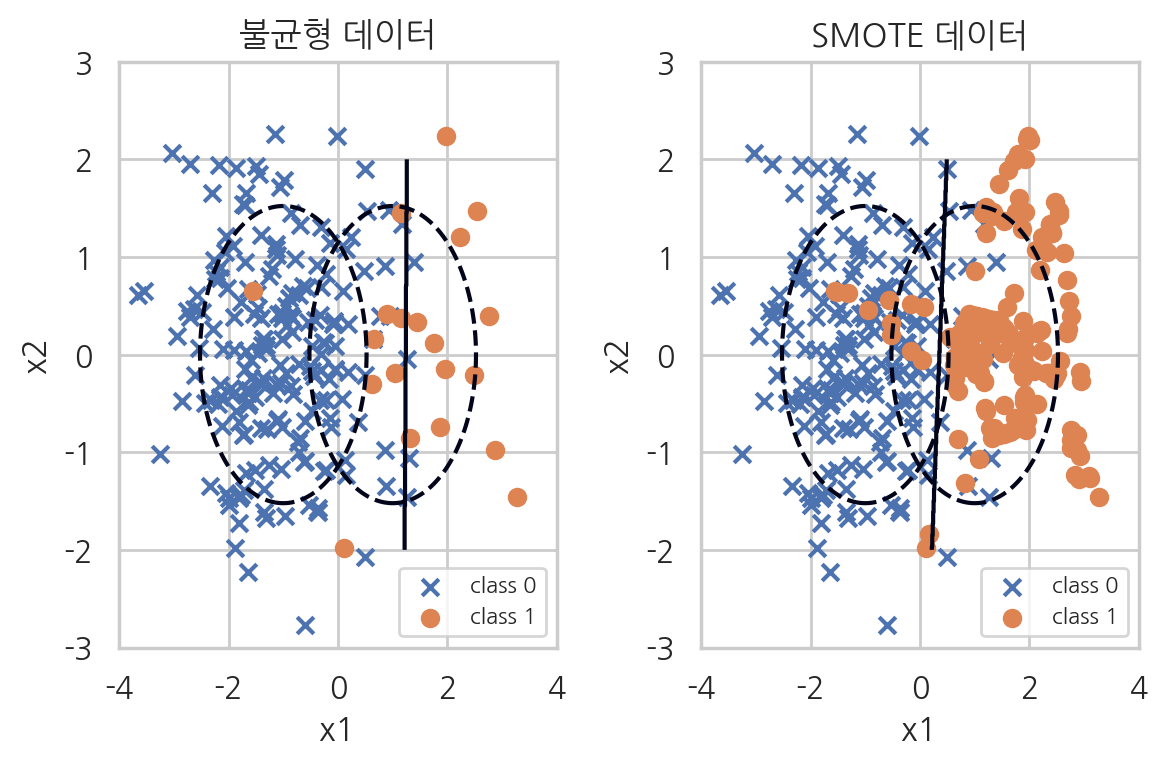

In [266]:
X_smot, y_smot = SMOTE(random_state=4).fit_resample(x_imb, y_imb)

plt.subplot(121)
model_imb = classification_result2(x_imb, y_imb, "불균형 데이터")

plt.subplot(122)
model_smot = classification_result2(X_smot, y_smot, "SMOTE 데이터")

plt.tight_layout()
plt.show() ; 

In [267]:
print("----------- 불균형 데이터 -----------")
print(classification_report(y_imb, model_imb.predict(x_imb)))

print("----------- SMOTE 데이터 -----------")
print(classification_report(y_imb, model_smot.predict(x_imb)))

----------- 불균형 데이터 -----------
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220

----------- SMOTE 데이터 -----------
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95       200
         1.0       0.50      0.90      0.64        20

    accuracy                           0.91       220
   macro avg       0.74      0.91      0.80       220
weighted avg       0.94      0.91      0.92       220



## Combine sampling

In [268]:
from imblearn.combine import *

### SMOTEENN()
- SMOTE + ENN
   - 데이터를 생성하고
   - 다수 클래스 주변의 k개의 데이터가 다수 클래스 데이터가 아닌경우 삭제(소수 클래스 주변의 다수 클래스 데이터가 제거된다.)

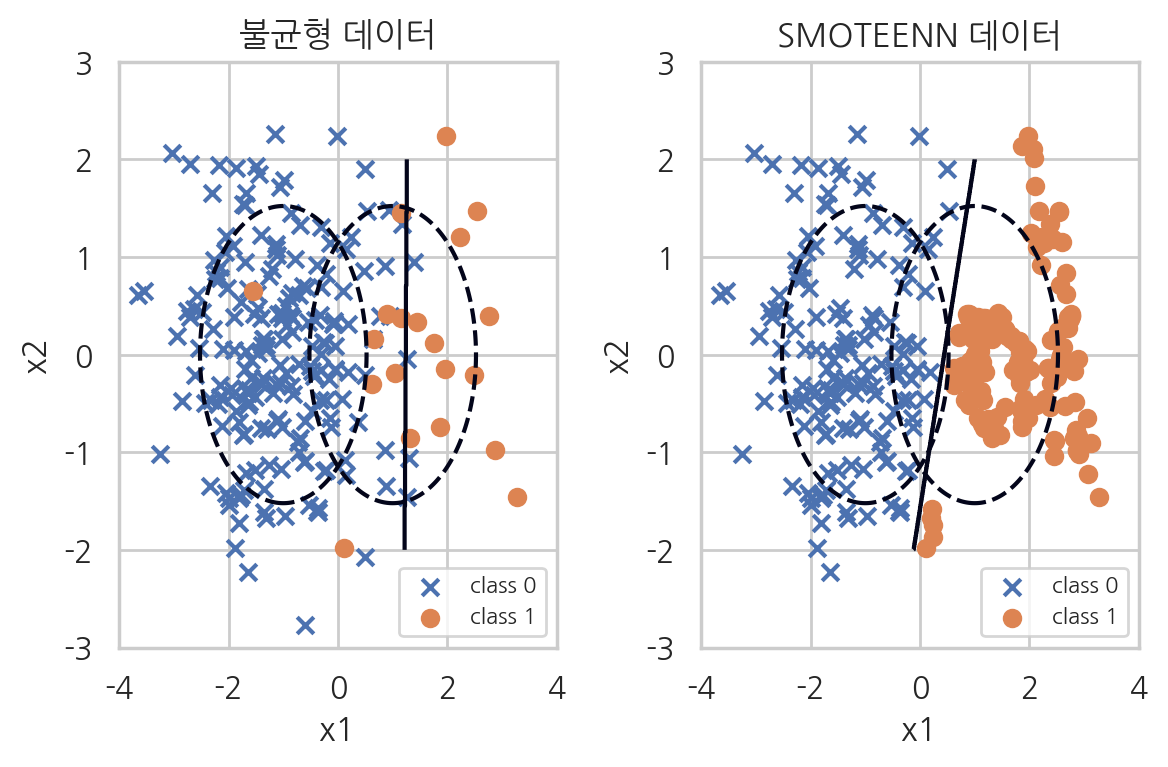

In [270]:
X_smenn, y_smenn = SMOTEENN(random_state=0).fit_resample(x_imb, y_imb)

plt.subplot(121)
model_imb = classification_result2(x_imb, y_imb, "불균형 데이터")

plt.subplot(122)
model_smenn = classification_result2(X_smenn, y_smenn, "SMOTEENN 데이터")

plt.tight_layout()
plt.show() ; 

In [271]:
print("----------- 불균형 데이터 -----------")
print(classification_report(y_imb, model_imb.predict(x_imb)))

print("----------- SMOTE+ENN 데이터 -----------")
print(classification_report(y_imb, model_smenn.predict(x_imb)))

----------- 불균형 데이터 -----------
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220

----------- SMOTE+ENN 데이터 -----------
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96       200
         1.0       0.54      0.95      0.69        20

    accuracy                           0.92       220
   macro avg       0.77      0.94      0.82       220
weighted avg       0.95      0.92      0.93       220



### SMOTETomek()
- SMOTE + Tomek
   - 생성하고,
   - tomek link 를 찾아서 다수 클래스 데이터를 제거

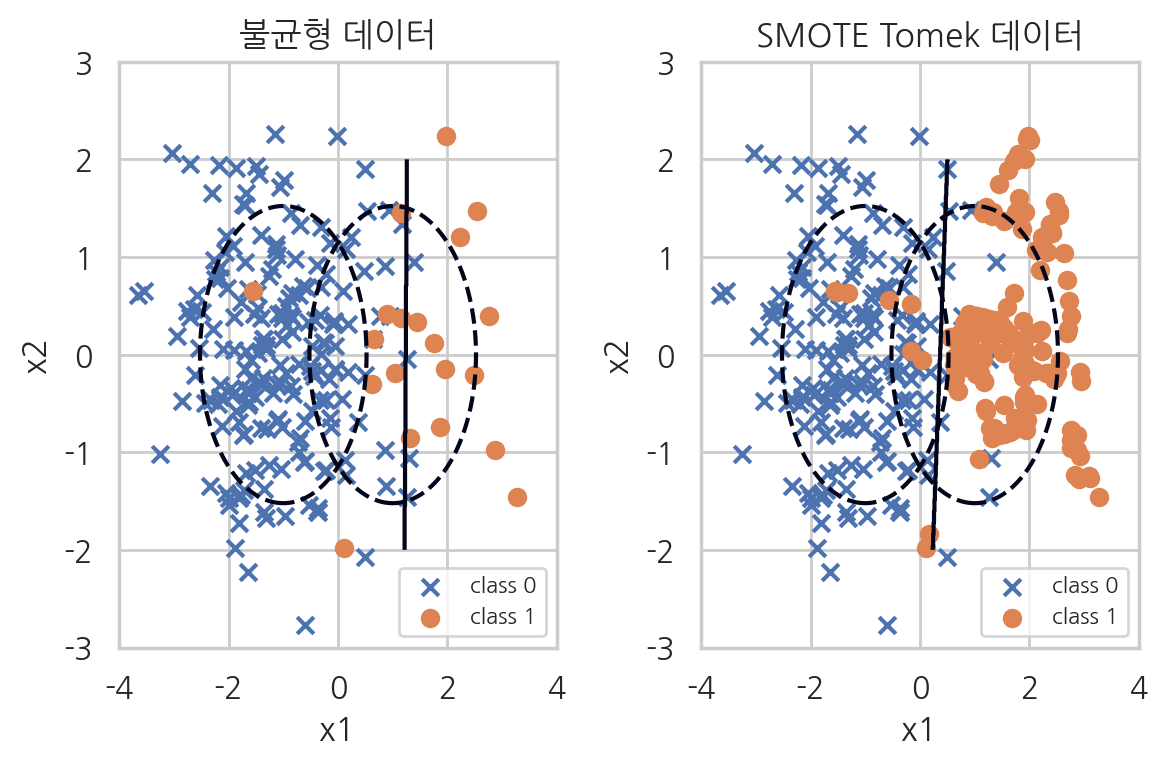

In [272]:
X_smtomek, y_smtomek = SMOTETomek(random_state=4).fit_resample(x_imb, y_imb)

plt.subplot(121)
model_imb = classification_result2(x_imb, y_imb, "불균형 데이터")

plt.subplot(122)
model_smtomek = classification_result2(X_smtomek, y_smtomek, "SMOTE Tomek 데이터")

plt.tight_layout()
plt.show() ; 

In [274]:
print("----------- 불균형 데이터 -----------")
print(classification_report(y_imb, model_imb.predict(x_imb)))

print("----------- SMOTE+Tomek 데이터 -----------")
print(classification_report(y_imb, model_smtomek.predict(x_imb)))

----------- 불균형 데이터 -----------
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220

----------- SMOTE+Tomek 데이터 -----------
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       200
         1.0       0.51      0.90      0.65        20

    accuracy                           0.91       220
   macro avg       0.75      0.91      0.80       220
weighted avg       0.95      0.91      0.92       220



## 전체 샘플링 모델의 성능 비교
- 샘플링한 데이터를 사용하여 훈련한 SVC 모형

In [277]:
sampling_models = ["model_samp", "model_tomek", "model_cnn", "model_oss",
                         "model_enn", "model_ncr", "model_ros", "model_asn",
                         "model_smot", "model_smenn", "model_smtomek"]
sampling_models

['model_samp',
 'model_tomek',
 'model_cnn',
 'model_oss',
 'model_enn',
 'model_ncr',
 'model_ros',
 'model_asn',
 'model_smot',
 'model_smenn',
 'model_smtomek']

In [276]:
def get_metrics_df(x_imb, y_imb, model_name) : 
    
    dfs = {}
    model = eval(model_name)
    names = ["pos_neg"] + [v for v in classification_report(
        y_imb, model.predict(x_imb)).split("\n")[0].split(" ") if v != ""]
    pos_met = [v for v in classification_report(
        y_imb, model.predict(x_imb)).split("\n")[2].split(" ") if v != ""]
    neg_met = [v for v in classification_report(
        y_imb, model.predict(x_imb)).split("\n")[3].split(" ") if v != ""]
    datas = np.array([pos_met, neg_met], dtype=float)
    df = pd.DataFrame(datas, columns=names)
    df["model_name"] = model_name
    
    return df

In [278]:
dfs = []
for model_name in sampling_models : 
    dfs.append(get_metrics_df(x_imb, y_imb, model_name))

In [279]:
metric_df = pd.concat(dfs)
metric_df["mean"] = metric_df[["precision", "recall", "f1-score"]].mean(axis=1)
metric_df

,pos_neg,precision,recall,f1-score,support,model_name,mean
0,0.0,0.99,0.92,0.95,200.0,model_samp,0.953333
1,1.0,0.51,0.90,0.65,20.0,model_samp,0.686667
0,0.0,0.96,0.99,0.98,200.0,model_tomek,0.976667
1,1.0,0.86,0.60,0.71,20.0,model_tomek,0.723333
0,0.0,0.99,0.82,0.90,200.0,model_cnn,0.903333
1,1.0,0.35,0.95,0.51,20.0,model_cnn,0.603333
0,0.0,0.97,0.97,0.97,200.0,model_oss,0.970000
1,1.0,0.70,0.70,0.70,20.0,model_oss,0.700000
0,0.0,0.99,0.94,0.96,200.0,model_enn,0.963333
1,1.0,0.58,0.90,0.71,20.0,model_enn,0.730000


In [282]:
metric_df[metric_df["pos_neg"]==1.0].sort_values(["mean", "recall"], ascending=False)

,pos_neg,precision,recall,f1-score,support,model_name,mean
1,1.0,0.58,0.90,0.71,20.0,model_enn,0.730000
1,1.0,0.54,0.95,0.69,20.0,model_smenn,0.726667
1,1.0,0.86,0.60,0.71,20.0,model_tomek,0.723333
1,1.0,0.51,0.95,0.67,20.0,model_ros,0.710000
1,1.0,0.62,0.80,0.70,20.0,model_ncr,0.706667
1,1.0,0.70,0.70,0.70,20.0,model_oss,0.700000
1,1.0,0.51,0.90,0.65,20.0,model_samp,0.686667
1,1.0,0.51,0.90,0.65,20.0,model_smtomek,0.686667
1,1.0,0.47,0.95,0.63,20.0,model_asn,0.683333
1,1.0,0.50,0.90,0.64,20.0,model_smot,0.680000
